# Atividade 01 - Parte 01: Inventário de emissões utilizando Python


#### Alunos: Matheus Henrique Lourenço de Oliveira (19205617) e Mayara Dargas Sousa (20203642)

## Introdução

O presente estudo tem o objetivo de realizar uma estimativa das emissões de Material Particulado (PM), Óxidos de Nitrogênio (NOx), Dóxido de Enxofre (SO2) e Dióxido de carbono (CO2) com base em dados do Relatório de ESG do grupo MOHAWK, o qual a marca Eliane revestimentosfaz parte. Foi utilizado o capítulo 11.7 da AP42, pois o empreendimento trata-se de uma Indústria de Revestimentos Cerâmicos (https://www.epa.gov/sites/default/files/2020-10/documents/c11s07.pdf).

Os valores descritos na tabela seguir apresenta os fatores de emissão fornecidos pela AP-42, os quais foram convertidos de lb/ton para kg/ton, conforme instruções da Ap-42. Para o dióxido de enxofre (SO2), foi adotado o valor citado na referência: "Reference 10. For facilities using raw material with a sulfur content greater than 0.07 percent. The variable S represents the raw material sulfur content (percent). For facilities using raw material with a sulfur content less than or equal to 0.07 percent, use 9.5 S lb/ton to estimate emissions.”

## Fluxograma do processo produtivo

In [211]:
# se sobrar tempo colocar o fluxograma aqui 

## Planilha de fatores de emissões compilada

In [14]:
import pandas as pd
import os
from IPython.display import display

# Coletando o caminho da pasta que estamos
caminho_atual = os.getcwd()

# Definindo o caminho da pasta dos fatores de emissão
caminho_fe = os.path.join(caminho_atual, 'tabelas', 'FE')

# Indicando o número do capítulo e subcapítulo
capitulo = 11
subcapitulo = 7

# Construindo o nome do arquivo
nome_arquivo = f'chp_{capitulo}_{subcapitulo}.csv'

# Caminho completo do arquivo
caminho_arquivo = os.path.join(caminho_fe, nome_arquivo)

# Abrindo o arquivo utilizando o Pandas
fe = pd.read_csv(caminho_arquivo)

# Estilizando a planilha com cores alternadas para as linhas e colunas
styled_fe = fe.style.set_properties(**{'text-align': 'center'}) \
                     .set_table_styles([
                         {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
                         {'selector': 'tr:nth-child(odd)', 'props': [('background-color', 'white')]},
                         {'selector': 'th', 'props': [('background-color', '#e6e6e6')]},
                         {'selector': 'td', 'props': [('background-color', 'white')]}
                     ])

# Exibindo a planilha estilizada na tela
display(styled_fe)

#obs: centralizar a planilha e diminuir casas decimais se possível

,Source,PM,SO2,NOX,CO2
0,Comminution,0.060000,nan,nan,nan
1,Dryer,1.150000,nan,nan,nan
2,Cooler,0.055000,nan,nan,nan
3,Granulation,0.095000,nan,nan,nan
4,Firing natural gas,0.245000,4.750000,0.270000,390.000000
5,Refiring natural gas,0.033500,nan,nan,48.500000
6,Ceramic glaze spray booth,0.900000,nan,nan,nan


## Estimativa da produção: premissas adotadas e valores fornecidos

Conforme dados institucionais de 2021, a Eliane revestimentos produz 40.8 milhões de m² de revestimentos por ano, distribuídos em 6 unidades em todo o Brasil. Assumindo a premissa de que cada unidade produz a mesma quantidade, a unidade de interesse, em Criciúma - SC, produziria aproximadamente 6.8 milhões de m² de revestimento.

Além disso, de modo a estimar este valor em toneladas, foram utilizados os valores de peso e medida do modelo mais vendido da fábrica, o porcelanato Bianco plus NA 60X60 com as seguintes especificações técnicas:

- Peso da caixa: 30,38 kg
- Rendimento: 1,44 m²

Portanto, se: 

30,38 kg ----- 1,44 m² 

   X     ----- 6.8 x 10^6 m²

X = 143.46111 x 10^6 kg = 143461,11 toneladas/ano

## Plotando os fatores de emissão

364176.02773499995
1
2
3
4


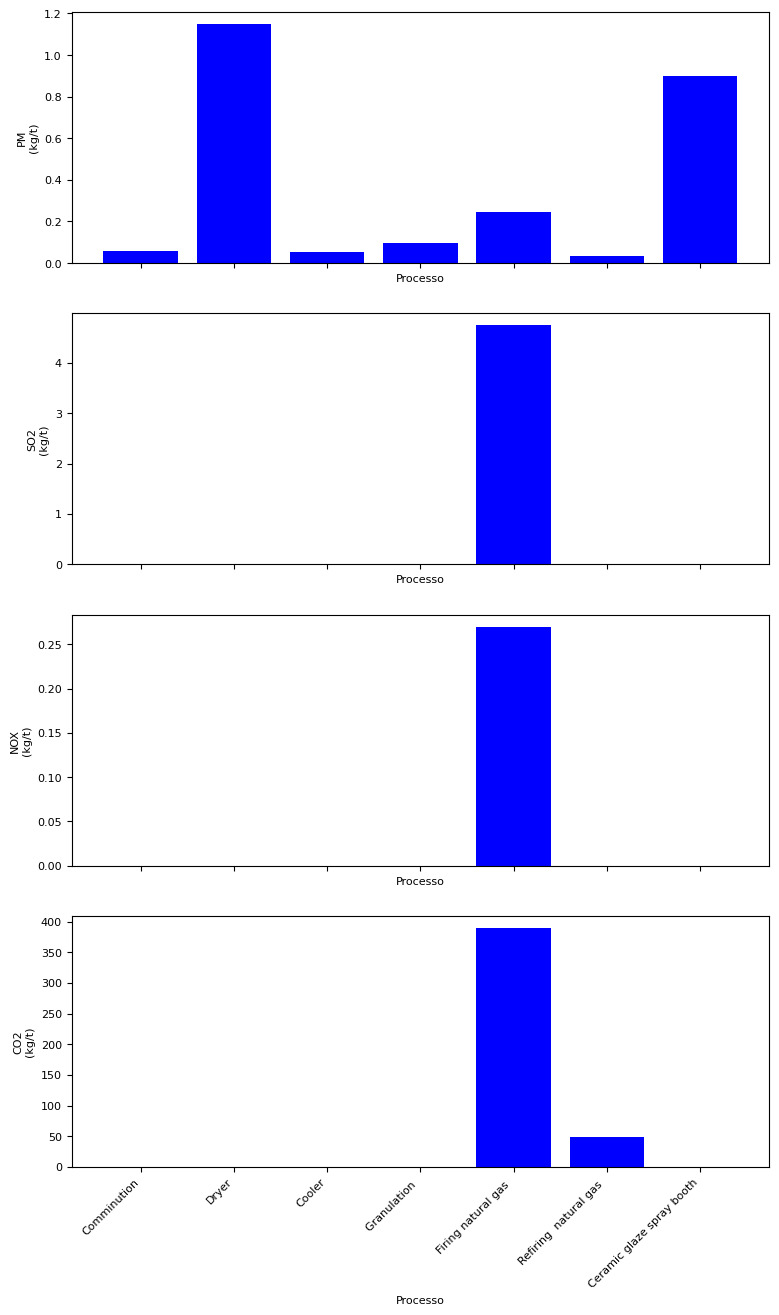

In [15]:
import matplotlib.pyplot as plt

atv = 143461.11 #A unidade descrita aqui é tonelas. Os processos para determinar este valor estão descritos anteriormente
emis = fe['PM']*atv

cwd = os.getcwd()

#Somando dataframe
print(emis.sum())

# Criando a figura com Matplotlib
# Subplots com número de linhas igual ao número de poluentes
# sharex significa compartilhar o eixo x
fig,ax = plt.subplots(len(fe.columns)-1,1,sharex = True,figsize=(9, 15))

# Loop para preencher o subplot com os gráficos de barra
for ii in range(1,len(fe.columns)):
    print(ii)
    ax[ii-1].bar(fe['Source'],fe.iloc[:,ii],color = ['blue'])
    ax[ii-1].set_xlabel('Processo', fontsize=8)  # Define o tamanho da fonte para o eixo x
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n(kg/t)', fontsize=8)  # Define o tamanho da fonte para o eixo y

    # Define o tamanho da fonte para os rótulos dos ticks nos eixos x e y
    ax[ii-1].tick_params(axis='x', labelsize=8)
    ax[ii-1].tick_params(axis='y', labelsize=8)

    # Define os rótulos dos ticks nos eixos x
    ax[ii-1].set_xticks(fe['Source'].index)  # Define a localização dos ticks no eixo x
    ax[ii-1].set_xticklabels(fe['Source'], rotation=45, ha='right', fontsize=8)  # Define os rótulos dos ticks no eixo x

# Salva a figura na pasta figures 
fig.savefig(cwd+'\\figures\\barplot_fatorEmiss.png')

#obs: melhorar as cores do gráfico

# Criando taxa de atividade aleatória com sazonalidade

### Série temporal das emissões mensais do empreendimento

XXXXXXXXX EXPLICAR acho que tem que dividir os valores por 12
### Nesta sessão nós criaremos uma taxa de atividade de um empreendimento qualquer que contenha sazonalidade ao longo dos meses do ano. Esta variabilidade também deve conter uma componente aleatória.

         Atividade
0    276343.309591
1    173063.778335
2    237759.067834
3    229541.511683
4    207909.892591
..             ...
995  206375.007958
996  190137.017005
997  185693.894950
998  244022.779232
999  221494.476980

[1000 rows x 1 columns]


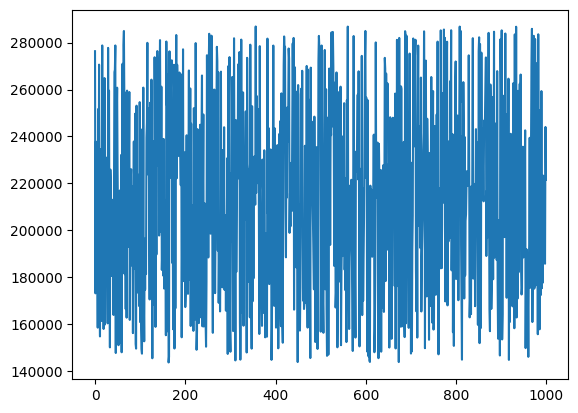

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Criando vetor de valores aleatórios
atvMax = 143461.11
atvMin = 286922.22
n = 1000
atv = (atvMax - atvMin) * np.random.rand(n) + atvMin
#print(atv)

# Exportando os dados para um arquivo .csv
output_folder = 'outputs'
output_file = 'dados_aleatorios.csv'
output_path = os.path.join(output_folder, output_file)

# Criando DataFrame com os dados aleatórios
df = pd.DataFrame({'Atividade': atv})
print(df)

# Salvando o DataFrame como arquivo .csv
df.to_csv(output_path, index=False)

# Criando uma figura com os valores aleatórios
fig, ax = plt.subplots()
ax.plot(atv)
plt.show()


In [19]:
# Criando vetor de datas
import pandas as pd

# Criar um intervalo de datas
datas = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Criar um DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['Data'].dt.month

# Mostrar o DataFrame resultante
print(df)

#obs: este dataframe esta com resolução apenas de dias?

          Data  Mes
0   2024-01-01    1
1   2024-01-02    1
2   2024-01-03    1
3   2024-01-04    1
4   2024-01-05    1
..         ...  ...
361 2024-12-27   12
362 2024-12-28   12
363 2024-12-29   12
364 2024-12-30   12
365 2024-12-31   12

[366 rows x 2 columns]


          Data  Mes      atividade
0   2024-01-01    1  252392.588389
1   2024-01-02    1  258647.735378
2   2024-01-03    1  167869.589778
3   2024-01-04    1  176274.871216
4   2024-01-05    1  266596.905381
..         ...  ...            ...
361 2024-12-27   12  269266.808093
362 2024-12-28   12  192220.523369
363 2024-12-29   12  212069.190368
364 2024-12-30   12  154688.407663
365 2024-12-31   12  169935.548157

[366 rows x 3 columns]


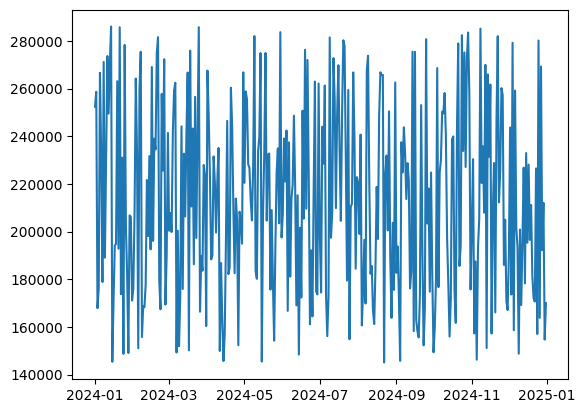

In [20]:
# Ajustar meus números aleatórios com base no comprimento do vetor de datas

# Criando dataframe com datas e valores de atividade aleatória
import pandas as pd
# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Criando atividade aleatória
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
df['atividade'] = atv
#print(atv)
print(df)
df.to_csv(r"C:\ENS5173_MayaraDargas\ENS5173-2024.1_MayaraDargasSousa\tabelas\ativ0.csv")

#Criando uma figura com os valores aleatórios
fig, ax= plt.subplots()
ax.plot(datas, atv)

0      0.866025
1      0.866025
2      0.866025
3      0.866025
4      0.866025
         ...   
361    1.000000
362    1.000000
363    1.000000
364    1.000000
365    1.000000
Name: Mes, Length: 366, dtype: float64


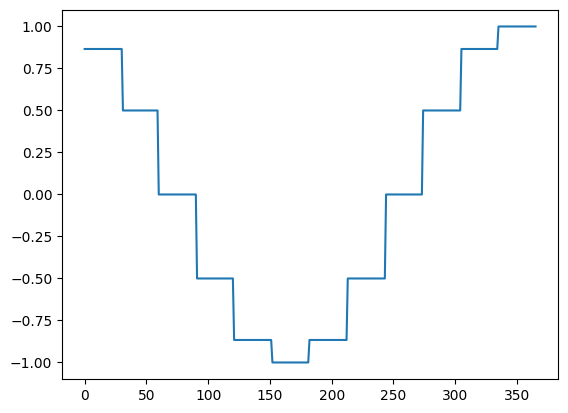

In [21]:
# Criando componente sazonal

sazonalidade = np.cos((2*np.pi)*df['Mes']/12)
plt.plot(sazonalidade)
df['sazonalidade'] = sazonalidade + 1
df.to_csv 
print(sazonalidade)

df.to_csv(r"C:\ENS5173_MayaraDargas\ENS5173-2024.1_MayaraDargasSousa\tabelas\ativ.csv")

          Data  Mes      atividade  sazonalidade  aleatorioSazonal
0   2024-01-01    1  252392.588389      1.866025     470970.981660
1   2024-01-02    1  258647.735378      1.866025     482643.244847
2   2024-01-03    1  167869.589778      1.866025     313248.919048
3   2024-01-04    1  176274.871216      1.866025     328933.387739
4   2024-01-05    1  266596.905381      1.866025     497476.598011
..         ...  ...            ...           ...               ...
361 2024-12-27   12  269266.808093      2.000000     538533.616186
362 2024-12-28   12  192220.523369      2.000000     384441.046737
363 2024-12-29   12  212069.190368      2.000000     424138.380735
364 2024-12-30   12  154688.407663      2.000000     309376.815326
365 2024-12-31   12  169935.548157      2.000000     339871.096314

[366 rows x 5 columns]


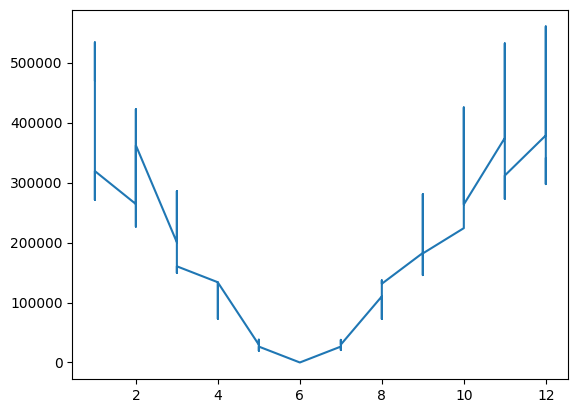

In [22]:
# Valores aleatórios com sazonalidade

df['aleatorioSazonal'] = df['atividade'] * df['sazonalidade'] 
print(df)

plt.plot(df['Mes'], df['aleatorioSazonal'])

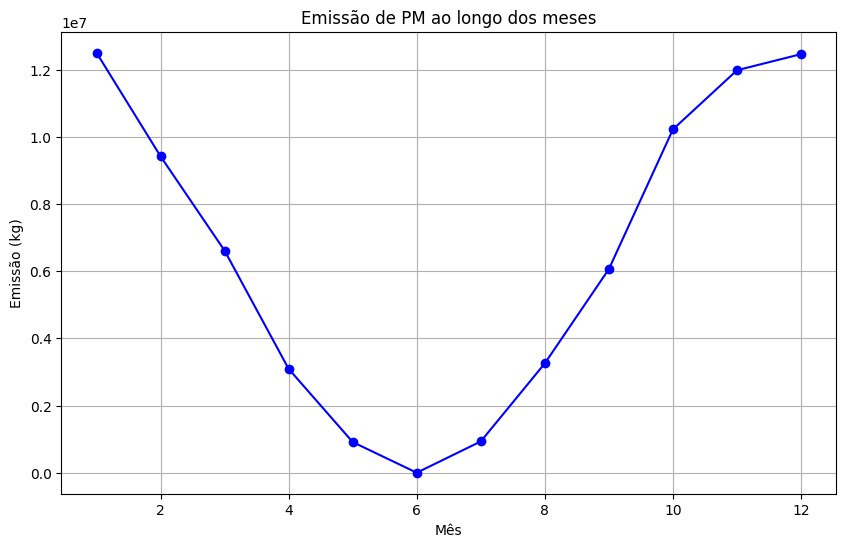

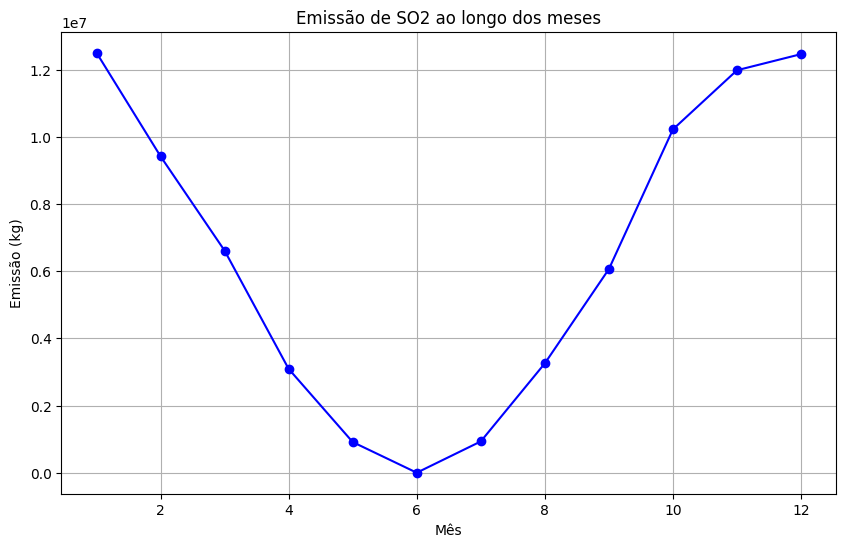

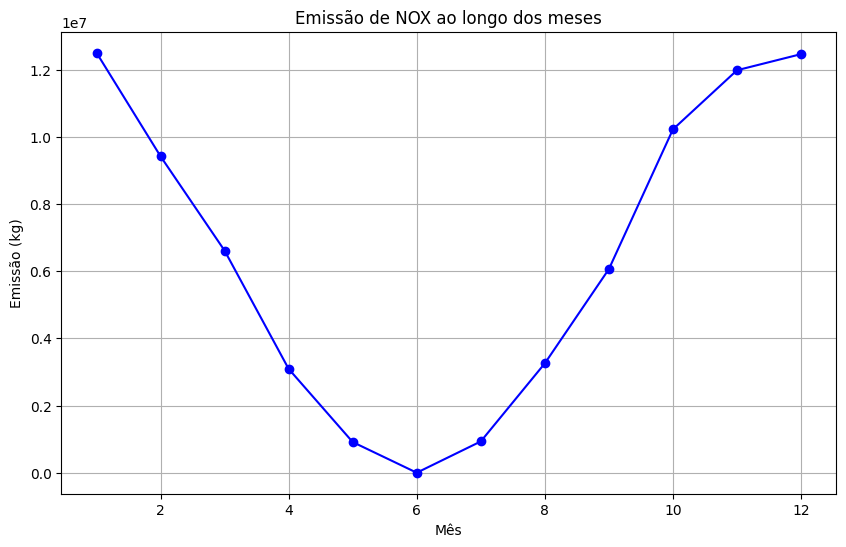

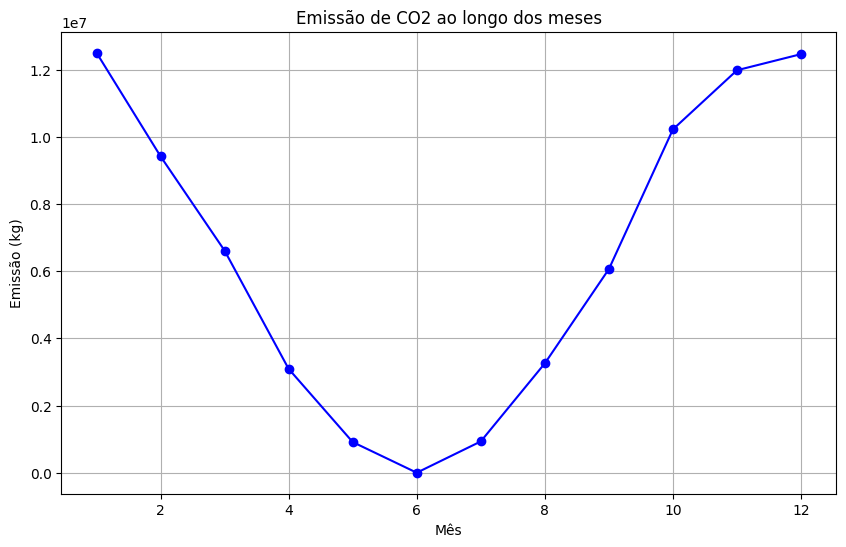

In [23]:
# Calcular a emissão mensal para cada poluente
emissoes_mensais = {}
for poluente in fe.columns[1:]:
    # Agrupar por mês e somar as emissões diárias
    emissoes_mensais[poluente] = df.groupby('Mes')['aleatorioSazonal'].sum()

# Plotar os gráficos de emissão para cada poluente
for poluente, emissao_mensal in emissoes_mensais.items():
    plt.figure(figsize=(10, 6))
    plt.plot(emissao_mensal.index, emissao_mensal.values, marker='o', color='blue')
    plt.title(f'Emissão de {poluente} ao longo dos meses')
    plt.xlabel('Mês')
    plt.ylabel('Emissão (kg)')
    plt.grid(True)
    plt.show()
 
    
    #arrumar por processos 

In [144]:

### Qual é o processo do empreendimento que possui maior emissão? analise os fatores de emissão através de figuras, comparando os processos
### - Não tem como responder precisamente pq nem todos o equipamento apresentam os fatores de emissão bem definidos mas avaliando apenas pelo parâmetro PM seria o Ceramic glaze spray booth uncontrolled

### Qual a variabilidade temporal da taxa de atividade? estime esta taxa e demonstre a componente sazonal (variabilidade entre meses) e aleatória. Faça figuras e discuta. 
### Qual a soma das emissões considerando todos os processos? qual a emissão média, mínima e máxima (unidades sempre em gramas por segundo - g/s)
 

## Série temporal das emissões horárias do empreendimento

Dado que só possuímos um dado anual, a taxa de atividade foi convertida para toneladas por dia, resultando em um valor de aproximadamente 393,04 toneladas por dia. Reconhecendo que a produção não é um valor constante e que a produtividade pode variar de um dia para outro, consideramos dois cenários. No primeiro cenário, a taxa de atividade é calculada estipulando uma faixa de valores a partir de atividades máximas e mínimas, em que foi considerado uma variação de 393,04 ±0,5 ton/dia.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Parâmetros para valores aleatórios
atvMax = 393.54
atvMin = 392.54

# Criando vetor de datas
datas_horarias = pd.date_range(start='2023-01-01', end='2023-12-31 23:00:00', freq='h')

# Número de datas
n = len(datas_horarias)

# Gerando valores aleatórios ajustados ao número de datas
atv = (atvMax - atvMin) * np.random.rand(n) + atvMin

# Criando DataFrame com as datas e valores de atividade aleatória
df = pd.DataFrame({'Data': datas_horarias, 'Atividade': atv})

# Salvando o DataFrame como arquivo .csv
output_folder = 'outputs'
output_file = 'dados_aleatorios.csv'
output_path = os.path.join(output_folder, output_file)
df.to_csv(output_path, index=False)

# Extrair os horários das datas e adicioná-los como uma nova coluna no DataFrame
df['Hora'] = df['Data'].dt.hour

# Imprimindo o DataFrame
print("DataFrame:")
print(df)




DataFrame:
                    Data   Atividade  Hora
0    2023-01-01 00:00:00  393.028136     0
1    2023-01-01 01:00:00  393.445389     1
2    2023-01-01 02:00:00  393.406169     2
3    2023-01-01 03:00:00  392.800009     3
4    2023-01-01 04:00:00  393.493897     4
...                  ...         ...   ...
8755 2023-12-31 19:00:00  393.121288    19
8756 2023-12-31 20:00:00  392.572099    20
8757 2023-12-31 21:00:00  393.144861    21
8758 2023-12-31 22:00:00  393.083699    22
8759 2023-12-31 23:00:00  393.187864    23

[8760 rows x 3 columns]


In [6]:
# Gerando componente sazonal com o método de Monte Carlos

atvMax = 393.54 # Define os limites superior e inferior do intervalo desejado para os dados.
atvMin = 392.54
sazonalidade = (atvMax - atvMin)*sazonalidade + atvMin #Aplica o método de Monte Carlo para transformar uma amostra de dados aleatórios entre 0 e 1 (gerada anteriormente) em uma amostra dentro do intervalo desejado. O método de Monte Carlo é comumente usado para simulações e cálculos numéricos. Aqui, está sendo usado para escalar e transladar os valores aleatórios gerados anteriormente para o intervalo desejado.


df['sazonalidade'] = sazonalidade + 1
df.to_csv # Criando componente sazonal
print(sazonalidade)

plt.plot(sazonalidade)
df.to_csv(r"C:\ENS5173_MayaraDargas\ENS5173-2024.1_MayaraDargasSousa\tabelas\ativ.csv")

NameError: name 'sazonalidade' is not defined

In [7]:
# Valores aleatórios com sazonalidade

df['aleatorioSazonal'] = df['Atividade'] * df['sazonalidade'] 
print(df)

plt.plot(df['Hora'], df['aleatorioSazonal'])

KeyError: 'sazonalidade'

In [ ]:
# Calcular a emissão diária para cada poluente
emissoes_diarias = {}
for poluente in fe.columns[1:]:
    # Agrupar por mês e somar as emissões diárias
    emissoes_diaria[poluente] = df.groupby('Hora')['aleatorioSazonal'].sum()

# Plotar os gráficos de emissão para cada poluente
for poluente, emissao_diaria in emissoes_diarias.items():
    plt.figure(figsize=(10, 6))
    plt.plot(emissao_mensal.index, emissao_mensal.values, marker='o', color='blue')
    plt.title(f'Emissão de {poluente} ao longo dos meses')
    plt.xlabel('Hora')
    plt.ylabel('Emissão (kg)')
    plt.grid(True)
    plt.show()
 

Referências
- https://mohawkind.com/_pdf/Eliane_2022_ESG_PT.pdf
- https://www.eliane.com/institucional
- https://www.eliane.com/produtos/bianco-plus-na-60x60-sc-8017071 